<a href="https://colab.research.google.com/github/kalai2315/Deep-Learning-Codes/blob/main/Customer_Churn_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Classification on ‘Customer_Churn’using**
**Keras**

**Problem Statement:**
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

**Customer_churn Dataset Link:** https://drive.google.com/file/d/1E4cOoS3YQA1WF49yt6sqhs4tNlJTPnbl/view?usp=sharing

**Domain –Telecom**

**Domain Context –**
Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# List files in a specific folder
!ls /content/drive/MyDrive/customer_churn.csv


/content/drive/MyDrive/customer_churn.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Manipulation:

In [4]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#total number of male customers
sum(df['gender']=='Male')

3555

In [13]:
#total number of customers whose Internet Service is ‘DSL’
sum(df['InternetService']=='DSL')

2421

In [15]:
#Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]

In [21]:
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [23]:
#customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer1’
new_customer1 = df[(df['tenure']<10) | (df['TotalCharges']<500)]

In [24]:
new_customer1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [26]:
# distribution of customers would be churning out

names = df["Churn"].value_counts().keys().tolist()
sizes= df["Churn"].value_counts().tolist()

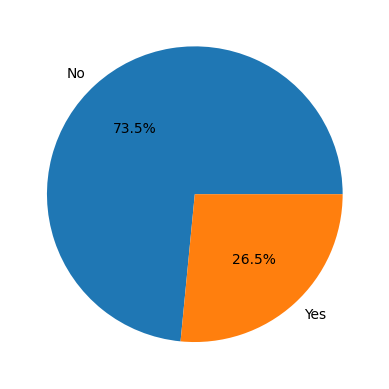

In [29]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

In [30]:
# distribution of ‘Internet Service’

names = df["InternetService"].value_counts().keys().tolist()
sizes= df["InternetService"].value_counts().tolist()

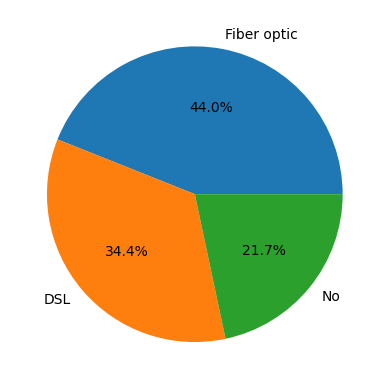

In [31]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

Model Building

In [5]:
df = pd.get_dummies(df,columns=['Churn'])

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,True,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,True,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,False,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,True,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,False,True


In [6]:
df.drop(['Churn_No'],axis=1,inplace=True)

In [8]:
x=df[['tenure']]
y=df[['Churn_Yes']]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.5202 - val_accuracy: 0.7511 - val_loss: 0.5075
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7595 - loss: 0.5010 - val_accuracy: 0.7511 - val_loss: 0.5072
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7573 - loss: 0.5092 - val_accuracy: 0.7511 - val_loss: 0.5079
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7575 - loss: 0.5062 - val_accuracy: 0.7511 - val_loss: 0.5077
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7580 - loss: 0.5028 - val_accuracy: 0.7511 - val_loss: 0.5071
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.5132 - val_accuracy: 0.7511 - val_loss: 0.5071
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7563 - loss: 0.4994 - val_accuracy: 0.7511 - val_loss: 0.5072
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7533 - loss: 0.5106 - val_accuracy: 0.

In [33]:
print(history.history)


{'accuracy': [0.7543610334396362, 0.754969596862793, 0.7543610334396362, 0.7543610334396362, 0.7547667622566223, 0.7535496950149536, 0.7539553642272949, 0.7541581988334656, 0.752738356590271, 0.7543610334396362, 0.754969596862793, 0.7569979429244995, 0.7541581988334656, 0.7543610334396362, 0.7541581988334656, 0.7545638680458069, 0.7535496950149536, 0.7551724314689636, 0.7563894391059875, 0.7543610334396362, 0.7543610334396362, 0.754969596862793, 0.7543610334396362, 0.7541581988334656, 0.7535496950149536, 0.7545638680458069, 0.7543610334396362, 0.7547667622566223, 0.7555781006813049, 0.7543610334396362, 0.754969596862793, 0.7529411911964417, 0.7541581988334656, 0.7545638680458069, 0.7543610334396362, 0.7521297931671143, 0.7541581988334656, 0.7529411911964417, 0.7559837698936462, 0.7543610334396362, 0.7543610334396362, 0.7541581988334656, 0.7537525296211243, 0.7537525296211243, 0.7543610334396362, 0.7553752660751343, 0.7543610334396362, 0.7539553642272949, 0.7539553642272949, 0.754361033

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413 (1.62 KB)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276 (1.08 KB)

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7435 - loss: 0.5032
Test Loss: 0.5068829655647278
Test Accuracy: 0.7510648369789124


In [35]:
np.mean(model.history.history['val_accuracy'])

0.751367723941803

In [36]:
y_pred = model.predict(x_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred.round())

array([[1392,  147],
       [ 379,  195]])

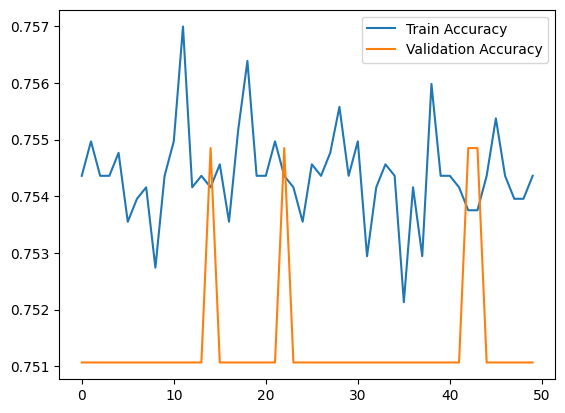

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [44]:
from keras.layers import Dropout

In [45]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=10)

Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6416 - loss: 1.4417 - val_accuracy: 0.7283 - val_loss: 0.5326
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6890 - loss: 0.6826 - val_accuracy: 0.7283 - val_loss: 0.5135
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7145 - loss: 0.5677 - val_accuracy: 0.7283 - val_loss: 0.5336
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7222 - loss: 0.5417 - val_accuracy: 0.7283 - val_loss: 0.5332
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7439 - loss: 0.5306 - val_accuracy: 0.7283 - val_loss: 0.5481
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7306 - loss: 0.5431 - val_accuracy: 0.7283 - val_loss: 0.5280
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7473 - loss: 0.5316 - val_accuracy: 0.7283 - val_loss: 0.5259
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7410 - loss: 0.5305 - val_accuracy: 0.

In [49]:
y_pred = model.predict(x_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [51]:
confusion_matrix(y_test, y_pred.round())

array([[1539,    0],
       [ 574,    0]])

In [52]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7267 - loss: 0.5234
Test Loss: 0.5268484950065613
Test Accuracy: 0.7283483147621155


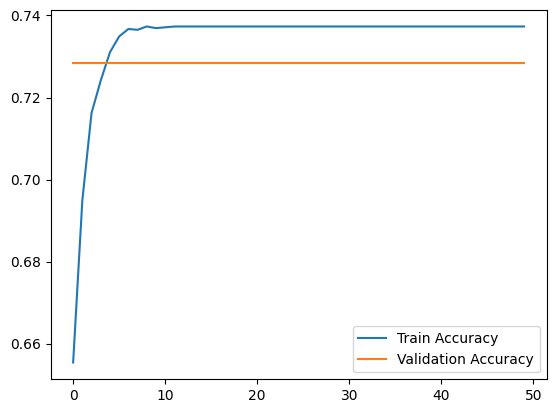

In [53]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [12]:
 # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal
from keras.optimizers import Adam

# Load and preprocess the data
x = df[['MonthlyCharges', 'tenure', 'TotalCharges']]  # Features
y = df['Churn_Yes']  # Target (flattened)

# Handle missing values
data = pd.concat([x, y], axis=1)  # Combine features and target
data = data.dropna()  # Drop rows with missing values
x = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])











/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model and save the history
history =model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7170 - loss: 0.5595 - val_accuracy: 0.7655 - val_loss: 0.4990
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7752 - loss: 0.4848 - val_accuracy: 0.7726 - val_loss: 0.4829
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7760 - loss: 0.4776 - val_accuracy: 0.7733 - val_loss: 0.4747
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.4600 - val_accuracy: 0.7726 - val_loss: 0.4733
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7855 - loss: 0.4474 - val_accuracy: 0.7768 - val_loss: 0.4680
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7861 - loss: 0.4487 - val_accuracy: 0.7754 - val_loss: 0.4658
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4482 - val_accuracy: 0.7790 - val_loss: 0.4645
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.4517 - val_accuracy: 0.

In [14]:
y_pred = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[966  67]
 [240 134]]


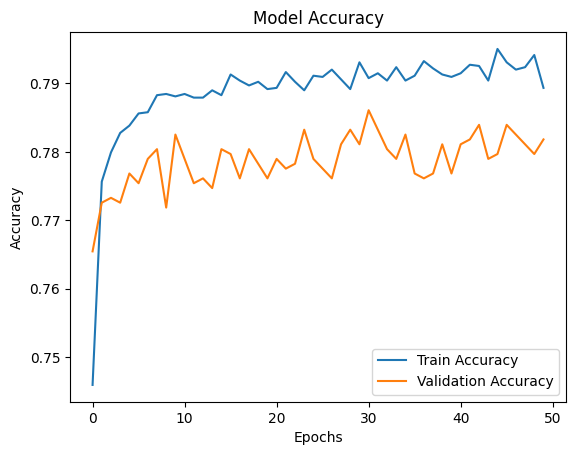

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


**Conclusion:**
The model performs well with training accuracy around 79% and validation accuracy around 78%.
The small gap between them shows the model is not overfitting.
Some fluctuations in validation accuracy might be due to noisy or imbalanced data.